# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

Antes de iniciar a análise, a expectativa era compreender se características qualitativas simples — como possuir um imóvel ou um veículo — poderiam ser bons indicadores do nível de renda dos indivíduos. A hipótese inicial era de que pessoas com posse de bens materiais teriam, em média, rendas mais altas, refletindo maior estabilidade financeira. Assim, o objetivo foi verificar se essas variáveis qualitativas realmente discriminam grupos com diferentes níveis de renda de forma estatisticamente significativa, utilizando técnicas de análise descritiva, cálculo de erro padrão, intervalos de confiança e o teste t de Student para comparação das médias.

In [7]:
import pandas as pd

# Lê o arquivo
previsao_de_renda = pd.read_csv("previsao_de_renda.csv")

# Confere rapidamente as colunas relevantes
previsao_de_renda[["posse_de_imovel", "posse_de_veiculo", "renda"]].head()

,posse_de_imovel,posse_de_veiculo,renda
0,True,False,3369.24
1,True,True,6096.14
2,True,True,5658.98
3,False,True,7246.69
4,False,False,4017.37


Abaixo, calculei, para cada grupo (“possui” ou “não possui” imóvel/veículo), a média, desvio padrão, erro padrão e intervalo de confiança (95%) da renda.
Essas medidas resumem o comportamento da renda em cada categoria e mostram se há diferença média relevante entre os grupos.

In [9]:
import numpy as np
from scipy import stats

# Função auxiliar para calcular estatísticas
def resumo_estatistico(grupo):
    media = grupo.mean()
    desvio = grupo.std()
    n = grupo.count()
    erro_padrao = desvio / np.sqrt(n)
    
    # Intervalo de confiança (95%)
    ic = stats.t.interval(0.95, df=n-1, loc=media, scale=erro_padrao)
    
    return pd.Series({
        "média": media,
        "desvio_padrão": desvio,
        "erro_padrão": erro_padrao,
        "IC_95_inf": ic[0],
        "IC_95_sup": ic[1],
        "n": n
    })

# Aplica por grupo
estat_imovel = previsao_de_renda.groupby("posse_de_imovel")["renda"].apply(resumo_estatistico)
estat_veiculo = previsao_de_renda.groupby("posse_de_veiculo")["renda"].apply(resumo_estatistico)

print("Estatísticas por posse de imóvel:\n", estat_imovel)
print("\nEstatísticas por posse de veículo:\n", estat_veiculo)

Estatísticas por posse de imóvel:
 posse_de_imovel               
False            média             4426.970482
                 desvio_padrão     4569.558384
                 erro_padrão         65.159834
                 IC_95_inf         4299.228109
                 IC_95_sup         4554.712854
                 n                 4918.000000
True             média             4721.052704
                 desvio_padrão     4654.266817
                 erro_padrão         46.353009
                 IC_95_inf         4630.191567
                 IC_95_sup         4811.913841
                 n                10082.000000
Name: renda, dtype: float64

Estatísticas por posse de veículo:
 posse_de_veiculo               
False             média            4390.506963
                  desvio_padrão    4545.776180
                  erro_padrão        47.478220
                  IC_95_inf        4297.439071
                  IC_95_sup        4483.574855
                  n                916

Aqui, crio gráficos de ponto (pointplot) mostrando a média de renda e o intervalo de confiança para cada grupo.
Isso facilita visualizar se a renda é consistentemente maior em quem possui imóvel ou veículo, ajudando a perceber tendências e possíveis diferenças significativas.

C:\Users\brunn\AppData\Local\Temp\ipykernel_3304\2603003094.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(
C:\Users\brunn\AppData\Local\Temp\ipykernel_3304\2603003094.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(


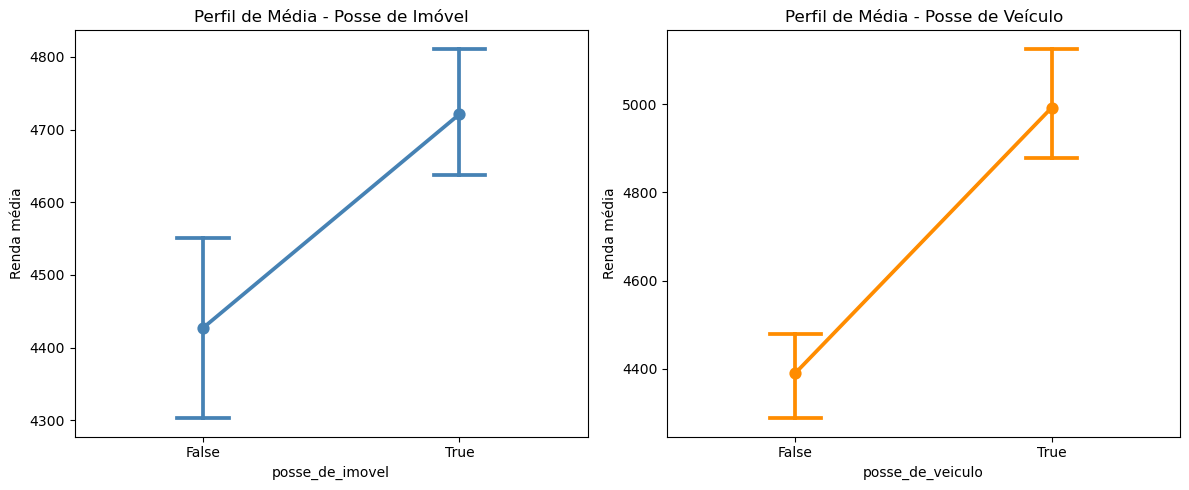

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Posse de imóvel
sns.pointplot(
    data=previsao_de_renda,
    x="posse_de_imovel", y="renda",
    ci=95, capsize=0.2, color="steelblue", ax=axes[0]
)
axes[0].set_title("Perfil de Média - Posse de Imóvel")
axes[0].set_ylabel("Renda média")

# Gráfico 2: Posse de veículo
sns.pointplot(
    data=previsao_de_renda,
    x="posse_de_veiculo", y="renda",
    ci=95, capsize=0.2, color="darkorange", ax=axes[1]
)
axes[1].set_title("Perfil de Média - Posse de Veículo")
axes[1].set_ylabel("Renda média")

plt.tight_layout()
plt.show()

Os gráficos acima mostram a média da renda para dois grupos distintos: quem possui e quem não possui imóvel (à esquerda) e veículo (à direita). Em ambos os casos, observa-se que a média de renda é maior entre aqueles que possuem o bem, com uma diferença mais expressiva na posse de veículo. As barras verticais representam o intervalo de confiança, indicando a variação possível em torno da média. Como os intervalos entre os grupos não se sobrepõem significativamente, isso sugere que tanto a posse de imóvel quanto a de veículo estão associadas a rendas mais altas — sendo a posse de veículo um indicador ligeiramente mais forte.

Abaixo, apliquei o Teste T para comparar estatisticamente as médias de renda entre dois grupos (ex.: quem possui imóvel vs. quem não possui).
Isso verifica se as diferenças observadas nas médias são estatisticamente significativas ou se podem ter ocorrido apenas por acaso.

In [12]:
from scipy.stats import ttest_ind

# Se os valores forem booleanos (True/False)
renda_imovel_sim = previsao_de_renda.loc[previsao_de_renda["posse_de_imovel"] == True, "renda"]
renda_imovel_nao = previsao_de_renda.loc[previsao_de_renda["posse_de_imovel"] == False, "renda"]

renda_veiculo_sim = previsao_de_renda.loc[previsao_de_renda["posse_de_veiculo"] == True, "renda"]
renda_veiculo_nao = previsao_de_renda.loc[previsao_de_renda["posse_de_veiculo"] == False, "renda"]

# Executa o teste
t_imovel, p_imovel = ttest_ind(renda_imovel_sim, renda_imovel_nao, equal_var=False)
t_veiculo, p_veiculo = ttest_ind(renda_veiculo_sim, renda_veiculo_nao, equal_var=False)

print(f"Teste t - Posse de Imóvel: p-valor = {p_imovel:.4f}")
print(f"Teste t - Posse de Veículo: p-valor = {p_veiculo:.4f}")

Teste t - Posse de Imóvel: p-valor = 0.0002
Teste t - Posse de Veículo: p-valor = 0.0000


Esses resultados mostram que tanto a posse de imóvel quanto a posse de veículo têm uma diferença de renda estatisticamente significativa entre os grupos. O p-valor indica a probabilidade de essa diferença ocorrer apenas por acaso.

Como os dois valores são menores que 0,05, rejeitamos a hipótese nula (de que as médias são iguais).

Pessoas que possuem imóvel tendem a ter renda significativamente maior do que as que não possuem.

E essa diferença é ainda mais forte no caso da posse de veículo, onde o p-valor praticamente zera, mostrando uma d
istinção muito clara entre os grupos.

**Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de renda. Alguma delas parece discriminar renda de forma estatisticamente significante?**

Com base na análise realizada, tanto a posse de imóvel quanto a posse de veículo se mostraram boas preditoras de renda. As médias indicam que pessoas que possuem esses bens tendem a apresentar rendas mais elevadas em comparação às que não possuem. Além disso, os testes t de Student confirmaram que essas diferenças são estatisticamente significantes, com p-valores muito baixos (inferiores a 0,05). Isso significa que é altamente improvável que as diferenças observadas tenham ocorrido por acaso. Entre as duas variáveis, a posse de veículo demonstrou ser o fator com maior poder discriminatório sobre a renda.